In [1]:
import numpy as np
import pandas as pd
from plotnine import *
import statistics 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from sklearn.model_selection import GridSearchCV

import plotly.graph_objects as go
import plotly.express as px 

**Regressão Liner Univariada** 

In [5]:
 #Usaremos o dataset no qual mediremos o comprimento de um cateter (em cm) de acordo com a altura (em metros) do paciente
df = pd.DataFrame(data=[[1.087, 37], [1.613, 50], [0.953, 34], [1.003, 36], [1.156,43], [0.978, 28], [1.092, 37], [0.572, 20], [0.940, 34], [0.597, 30], [0.838, 38], [1.473, 47]], columns=['Altura','Comprimento'])

In [6]:
df

,Altura,Comprimento
0,1.087,37
1,1.613,50
2,0.953,34
3,1.003,36
4,1.156,43
5,0.978,28
6,1.092,37
7,0.572,20
8,0.940,34
9,0.597,30


Visualizando os dados

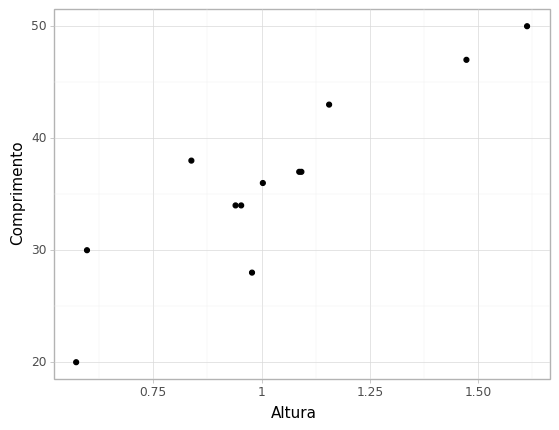

<ggplot: (8760663366041)>

In [7]:
(ggplot(df,aes('Altura','Comprimento'))
 + geom_point()
 + theme_light()
)

In [8]:
# Faremos uma cópia desse DF visto que ele será permutado
df_shuffle = df.copy()
df_shuffle 

,Altura,Comprimento
0,1.087,37
1,1.613,50
2,0.953,34
3,1.003,36
4,1.156,43
5,0.978,28
6,1.092,37
7,0.572,20
8,0.940,34
9,0.597,30


**Gradiente Descedente**

In [9]:
w0 = 10 # termo independente
w1 = 20 # coeficiente angular
alfa = 0.001 # Taxa de aprendizado
EQM = list() # Erro Quadrado Médio por época


In [10]:
for epoca in range(1000):
    acc = 0 
    erro = 0
    erro2 = 0
    for i in range(len(df_shuffle)):
        x_i = df_shuffle.iloc[i,0]
        y_i = df_shuffle.iloc[i,1]
        erro += (y_i - w1*x_i - w0)
        erro2 += (y_i - w1*x_i - w0)*df_shuffle.iloc[i,0]
        acc = acc + erro*erro
        
    w0 = w0 + (alfa*erro)/len(df_shuffle)
    w1 = w1 + (alfa*erro2)/len(df_shuffle)
        
    EQM.append(acc/len(df_shuffle))

Predição

In [11]:
print("Os pesos encontrados foram", w0, "e", w1)

Os pesos encontrados foram 12.343024298110999 e 22.60158300659572


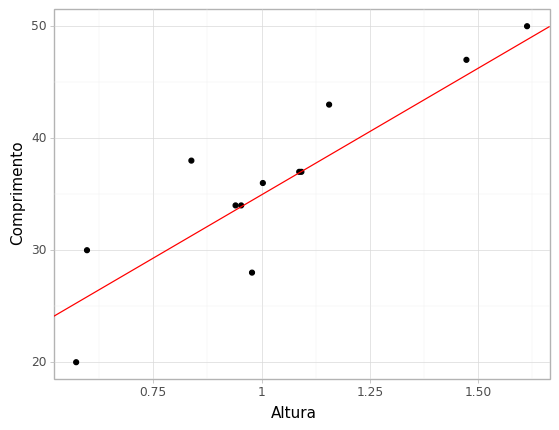

<ggplot: (8760663311677)>

In [12]:
(ggplot(df,aes('Altura','Comprimento'))
 + geom_point()
 + theme_light()
 + geom_abline(intercept=w0 , slope=w1, color='red')
)

In [13]:
def predict_(w0,w1,x):
    y = w1*x + w0
    return y

In [14]:
predict_(w0,w1,1.25)

40.59500305635565

Curva de aprendizado

In [15]:
# Convertendo lista em DataFrame para plotar no PlotNine
EQM_df = pd.DataFrame(EQM)
EQM_df

,0
0,1527.502000
1,1520.580635
2,1513.689589
3,1506.828730
4,1499.997931
...,...
995,17.165237
996,17.128610
997,17.092303
998,17.056314


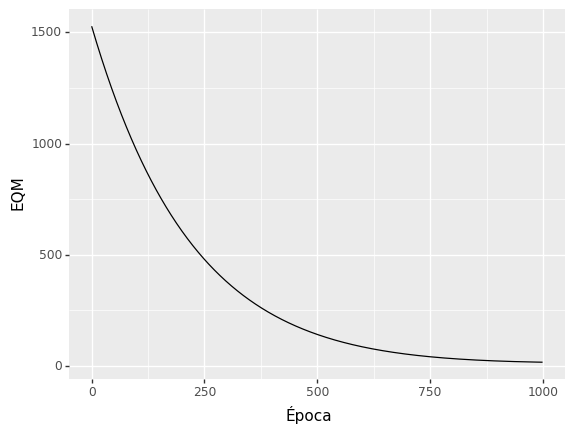

<ggplot: (8760663218089)>

In [16]:
 (ggplot(EQM_df, aes(EQM_df.index, EQM_df[0]))
+ geom_line()
+ xlab('Época')
+ ylab('EQM')
)

**Utilizando bibliotecas em Python**


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
X = df[['Altura']]
Y = df['Comprimento']

In [19]:
modelskl = LinearRegression()

In [20]:
modelskl.fit(X,Y)

LinearRegression()

In [21]:
modelskl.coef_

array([24.08702511])

In [23]:
 modelskl.intercept_

11.473451422316511

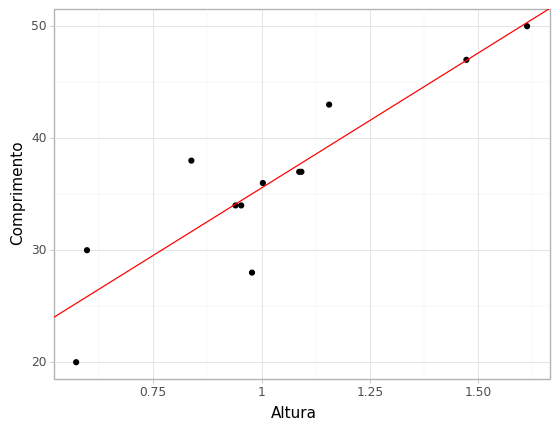

<ggplot: (8760663244009)>

In [24]:
(ggplot(df,aes('Altura','Comprimento'))
 + geom_point()
 + theme_light()
 + geom_abline(intercept=modelskl.intercept_ , slope=modelskl.coef_[0], color='red')
)

In [25]:
 modelskl.predict([[1.25]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


array([41.58223281])